# 파이썬으로 할 수 있는 것

파이썬은 여러가지 범용적인 목적으로 사용할 수 있는 언어이고, 파이썬으로 할 수 있는 것은 다른 범용적인 사용 용도로 개발될 언어들(C, C++, Java, Scalar, Haskel) 로도 구현할 수 있습니다.

씽크 파이썬에 소개된 간단한 "파이썬으로 할 수 있는 것"을 소개합니다.

## 1. 텍스트 검색해서 치환하기

http://daum.net  를   http://www.daum.net 으로 바꾸고 싶다.

구글에서 python string replace  검색

In [1]:
url = 'http://daum.net'
url.replace('http://', 'http://www.')

'http://www.daum.net'

http://daum.net 또는 https://daum.net 를 http://www.daum.net 또는 https://www.daum.net 으로 바꾸고 싶다.

더 복잡한 로직이 필요한 경우에는 정규식을 사용할 수 있다.

In [7]:
import re

re.sub(r'(https?://)', r'\1www.', url),  re.sub(r'(https?://)', r'\1www.', 'https://daum.net')


('http://www.daum.net', 'https://www.daum.net')

## 2. 이미지 처리

이미지를 더 작은 픽셀로 축소하기

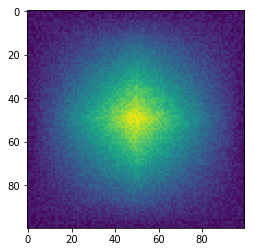

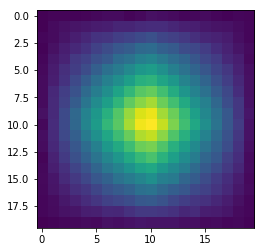

In [9]:
import numpy as np

def resize(img, width, height):
    w = img.shape[1]
    h = img.shape[0]

    assert w > width and h > height

    w_pos = slicing_positions(w, width)
    h_pos = slicing_positions(h, height)

    resized = []

    for h1, h2 in h_pos:
        for w1, w2 in w_pos:
            avg = int(np.mean(img[h1:h2, w1:w2]))
            resized.append(avg)

    resized = np.array(resized).reshape(height, width)

    return resized


def slicing_positions(large, small):
    pos = np.linspace(0, large - 1, small + 1)
    pos = np.floor(pos).astype(np.int)
    pos = [[e,e] for e in pos]
    pos = np.array(pos).reshape(-1)
    pos = pos[1:-1]
    pos[-1] += 1
    pos = pos.reshape(-1,2)
    pos = [(start, end) for start, end in pos]

    return pos


if __name__ == '__main__':
    import matplotlib.pyplot as plt

    def test_resize(w, h):
        
        img = np.random.randint(0,255,(100,100))
        ones = np.ones((100,100))
        mask = np.arange(50)
        mask = np.hstack((mask, mask[::-1]))
        mask = mask.reshape(-1,1) @ mask.reshape(1,-1)
        img = img + 1 * mask
        plt.imshow(img)
        plt.show()

        resized = resize(img, w, h)
        plt.imshow(resized)
        plt.show()
    test_resize(20,20)

## 3. 파일에 데이터 저장하기


In [10]:
def save_text_to_file(filename, text):
    with open(filename, 'wt') as f:
        f.write(text)
        
        
save_text_to_file('think_python.txt', 'Hello Python.')

## 4. 게임만들기

![Game](img/alien_invasion.jpg)

In [ ]:
import pygame
from pygame.sprite import Sprite

class Alien(Sprite):
    def __init__(self, ai_settings, screen):
        super().__init__()
        self.screen = screen
        self.ai_settings = ai_settings

        self.image = pygame.image.load('images/alien-spaceship.gif')
        self.rect = self.image.get_rect()

        # 처음 위치는 왼쪽 화면 위.  
        self.rect.x = self.rect.width
        self.rect.y = self.rect.height

        self.x = float(self.rect.x)

    def blitme(self):
        self.screen.blit(self.image, self.rect)

    def check_edges(self):
        screen_rect = self.screen.get_rect()
        if self.rect.right >= screen_rect.right:
            return True
        elif self.rect.left <= 0:
            return True
        return False

    def update(self):

        self.x += (self.ai_settings.alien_speed_factor *
                        self.ai_settings.fleet_direction)
        self.rect.x = self.x

## 5.웹 크롤링

웹페이지에서 html 로 얻을 수 있는 정보 중에서 원하는 부분을 저장하기


![Crawling](img/crawling1.jpg)

![Crawling](img/crawling2.jpg)

![Crawling](img/crawling3.jpg)

![Crawling](img/crawling_code.jpg)




## 6.머신러닝

숫자인식 데모

https://pm-mllab.herokuapp.com/mlimage/

